In [1]:
import os
os.chdir('..')

In [88]:
import json
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

figures_folder = '../figures/'
results_folder = './server/parameters/results/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [89]:
file = 'parameters_test.json'

In [90]:
res = json.load(open(results_folder + file))

In [91]:
params = ['thresh_upd', 'count_upd', 'window', 'factor_upd', 'perc_hybrid']

str_params = {
    'thresh_upd': '$\Delta$ [%]',
    'count_upd': '$C$',
    'window': '$W$',
    'factor_upd': '$\\tau$',
    'perc_hybrid': '$\Delta_H$ [%]'
}

base_param = {'perc_hybrid': 30, 'thresh_upd': 1, 'count_upd': 2, 'window': 10, 'factor_upd': 2}

In [92]:
def to_str(k):
    
    if k == 0.0:
        return "0"
    elif k < 1 or not (k).is_integer():
        return str(k)
    else:
        return str(int(k))

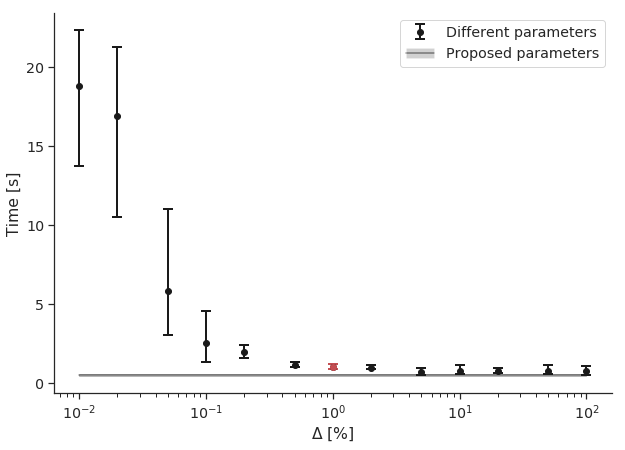

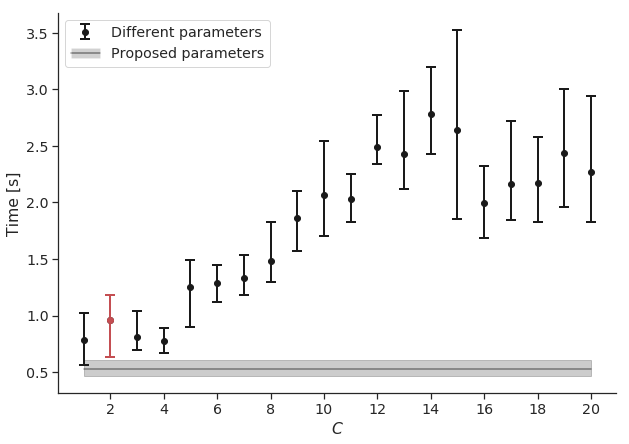

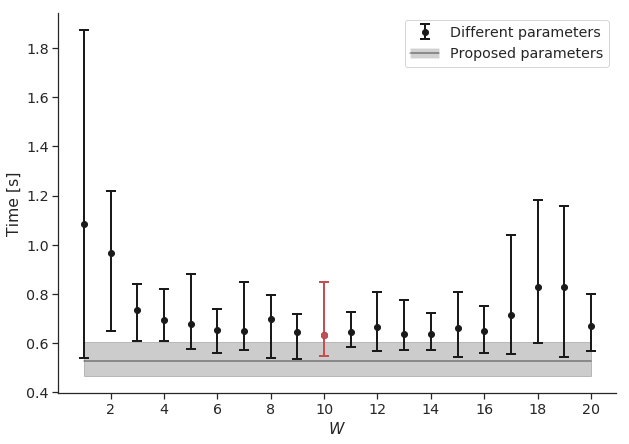

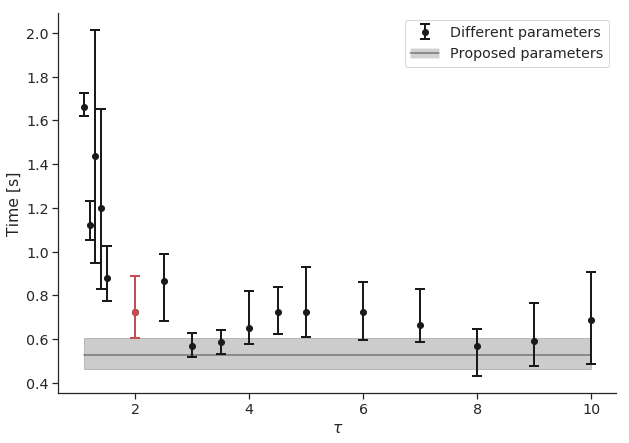

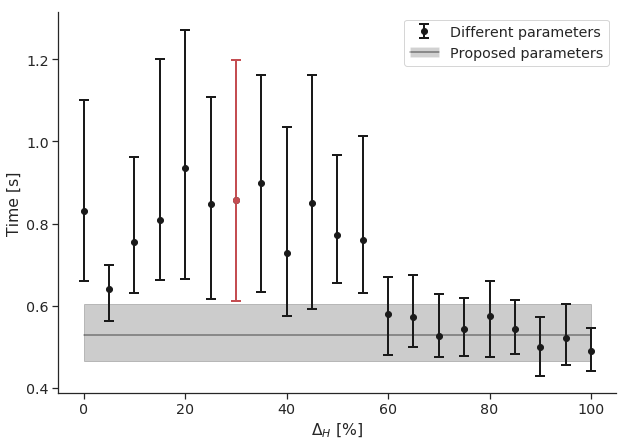

In [93]:
time = res['base']['time']

up = np.percentile(time, 97.5)
down = np.percentile(time, 2.5)
avg = np.mean(time)

for p in params:
    
    tmp = res[p]
    
    keys = list(map(float, tmp.keys()))
    keys.sort()
    
    err_down = [np.mean(tmp[to_str(k)]['time'])-np.percentile(tmp[to_str(k)]['time'], 2.5) for k in keys]
    err_up = [np.percentile(tmp[to_str(k)]['time'], 97.5)-np.mean(tmp[to_str(k)]['time']) for k in keys]
    err_avg = [np.mean(tmp[to_str(k)]['time']) for k in keys]
    
    plt.figure(figsize=(10, 7), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.3)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
        "font.scale": 2
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})

    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    p1 = plt.errorbar(keys, err_avg, yerr=[err_down, err_up], fmt='o', elinewidth=2, capthick=2, capsize=5, color='k')
    
    idx = keys.index(base_param[p])
    plt.errorbar(keys[idx], err_avg[idx], yerr=[[err_down[idx]], [err_up[idx]]], fmt='o', elinewidth=2, capthick=2, capsize=5, color='r')
    
    p2 = plt.fill_between([keys[0], keys[-1]], [down, down], [up, up], color='black', alpha=0.2)
    p3 = plt.plot([keys[0], keys[-1]], [avg, avg], 'k-', alpha=0.5)
    p4 = plt.fill(np.NaN, np.NaN, 'k', alpha=0.2)
    
    plt.xlabel(str_params[p])
    plt.ylabel('Time [s]')
    leg = plt.legend([p1, (p3[0], p4[0])], ['Different parameters', 'Proposed parameters'], frameon=True)  
    
    if p in ['thresh_upd']:
        plt.xscale('log')
        
    if p in ['count_upd', 'window']:
        plt.xticks([2,4,6,8,10,12,14,16,18,20])
        
    plt.savefig(figures_folder + 'png/effect_{}.png'.format(p), bbox_inches='tight')
    plt.savefig(figures_folder + 'pdf/effect_{}.pdf'.format(p), bbox_inches='tight')